### 1 - Etapa

Realizando tratamento no dataset original, eliminado dados inconsistentes e salvando em um novo dataset de forma ordenada.

In [179]:
import pandas as pd
from datetime import datetime
import numpy as np

caminho = './'
dataset_orig = 'dataset_reg_chuva_santa_maria_2011_2020_2.csv'

# caminho para o dataset
precipitacao = pd.read_csv(caminho + dataset_orig, sep = ';')
precipitacao = precipitacao.sort_values(by = ['DT_MEDICAO', 'HR_MEDICAO'])
# # reseta indice depois de ordenar linhas
precipitacao = precipitacao.reset_index(drop = True)

# pegando primeira e última data do dataset
datas = precipitacao['DT_MEDICAO']
data_inicial = datas[0]
data_final = datas[len(precipitacao) - 1]

# convertendo primeira e última data para formato datetime
data_inicial_date = datetime.strptime(data_inicial, '%Y-%m-%d')
data_final_date = datetime.strptime(data_final, '%Y-%m-%d')

# vetor de datas com o período compreendido
dif_data_final_data_inicial = data_final_date - data_inicial_date
datas_periodo = pd.date_range(data_inicial_date, periods = (dif_data_final_data_inicial.days + 1))
print("Entre", data_inicial_date.strftime("%d-%m-%Y"), "e", data_final_date.strftime("%d-%m-%Y"), "há", dif_data_final_data_inicial.days, "dias.\n")
print("Lista de dias do período: \n", datas_periodo, "\n")

# criando dataframe com as datas do período 
leituras = np.zeros(len(datas_periodo), dtype=int)
# criando estrutura dicionario com conjunto de dias e leituras
dias_periodo_leituras = pd.DataFrame({'DT_MEDICAO' : datas_periodo, 'CHUVA' : leituras})

for i, linha in dias_periodo_leituras.iterrows():
    # pegando data da linha
    datai_str = linha['DT_MEDICAO'].strftime("%d-%m-%Y")
    # conta o número de ocorrências da data na coluna DT_MEDICAO
    dias_periodo_leituras.at[i, 'CHUVA'] = len(precipitacao.loc[precipitacao['DT_MEDICAO'] == datai_str])
    # 

# gravando estrutura num arquivo separado
nome_arquivo = 'dias_periodo_leituras.csv'
dias_periodo_leituras.to_csv(caminho + nome_arquivo, index = False, sep = ';')

print("Arquivo com lista de dias e leituras criado com nome", nome_arquivo,", contendo a estrutura de dados: \n", dias_periodo_leituras, "\n")

Entre 01-01-2011 e 31-12-2020 há 3652 dias.

Lista de dias do período: 
 DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=3653, freq='D') 

Arquivo com lista de dias e leituras criado com nome dias_periodo_leituras.csv , contendo a estrutura de dados: 
      DT_MEDICAO  CHUVA
0    2011-01-01      0
1    2011-01-02      0
2    2011-01-03      0
3    2011-01-04      0
4    2011-01-05      0
...         ...    ...
3648 2020-12-27      0
3649 2020-12-28      0
3650 2020-12-29      0
3651 2020-12-30      0
3652 2020-12-31      0

[3653 rows x 2 columns] 



## 2 - Etapa

Acumular as leituras por dias e depois agrupar por trimestre.

O período entre 01-01-2011 e 31-12-2020 há 119 meses com 40 trimestres ao todo.

Trimestres: 40 
 Data limite de cada trimestre e a quantidade de coletas:
 DT_MEDICAO
2011-03-31    233.6
2011-06-30    216.4
2011-09-30     82.6
2011-12-31    191.4
2012-03-31    238.0
2012-06-30    155.4
2012-09-30    179.8
2012-12-31    438.6
2013-03-31    332.2
2013-06-30    264.8
2013-09-30    280.8
2013-12-31    332.4
2014-03-31    289.4
2014-06-30    351.8
2014-09-30    264.6
2014-12-31    399.6
2015-03-31    258.2
2015-06-30    260.8
2015-09-30    317.2
2015-12-31    580.8
2016-03-31    313.4
2016-06-30    167.6
2016-09-30    193.2
2016-12-31    466.8
2017-03-31    404.8
2017-06-30    371.0
2017-09-30    285.0
2017-12-31    274.2
2018-03-31    290.8
2018-06-30    132.4
2018-09-30    293.4
2018-12-31    355.2
2019-03-31    271.0
2019-06-30    259.4
2019-09-30    194.8
2019-12-31    405.0
2020-03-31    227.0
2020-06-30    201.2
2020-09-30    157.8
2020-12-31     30.8
Freq: Q-DEC, Name: CHUVA, dtype: 

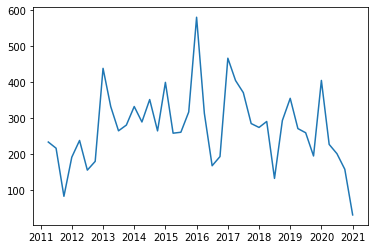

Q Leituras:
               sum  count      mean       std  min   max
DT_MEDICAO                                             
2011-03-31  233.6   1265  0.184664  1.527320  0.0  37.2
2011-06-30  216.4   1305  0.165824  1.265383  0.0  25.2
2011-09-30   82.6   1331  0.062059  0.472741  0.0  10.2
2011-12-31  191.4   1342  0.142623  1.178132  0.0  18.4
2012-03-31  238.0   1332  0.178679  1.707762  0.0  34.6
2012-06-30  155.4   1298  0.119723  1.082415  0.0  19.4
2012-09-30  179.8   1339  0.134279  0.870225  0.0  13.2
2012-12-31  438.6   1377  0.318519  1.606405  0.0  24.4
2013-03-31  332.2   1276  0.260345  1.935873  0.0  34.4
2013-06-30  264.8   1318  0.200910  1.305487  0.0  25.6
2013-09-30  280.8   1315  0.213536  1.042111  0.0  14.2
2013-12-31  332.4   1324  0.251057  1.726882  0.0  22.6
2014-03-31  289.4   1268  0.228233  1.536935  0.0  26.8
2014-06-30  351.8   1333  0.263916  1.356487  0.0  21.0
2014-09-30  264.6   1328  0.199247  1.189492  0.0  16.8
2014-12-31  399.6   1369  0.291892 

KeyError: 0

In [182]:

import pandas as pd
from datetime import datetime
import math as maths
import matplotlib.pyplot as plt

caminho = './'
dataset_leituras = 'dias_periodo_leituras.csv'
dataset_orig = 'dataset_reg_chuva_santa_maria_2011_2020_2.csv'

# caminho para o dataset leituras e dataset original
dias_periodo_leituras = pd.read_csv(caminho + dataset_leituras, sep = ';', parse_dates = ['DT_MEDICAO'])
precipitacao = pd.read_csv(caminho + dataset_orig, sep = ';')

data_inicial = dias_periodo_leituras.at[0, 'DT_MEDICAO']
data_final = dias_periodo_leituras.at[len(dias_periodo_leituras) - 1, 'DT_MEDICAO']

# quantidade de meses do período
dif_anos = (data_final.to_period('Y') - data_inicial.to_period('Y')).n
dif_meses = (data_final.to_period('M') - data_inicial.to_period('M')).n
trimestres = maths.ceil(dif_meses/3);
 
print("O período entre", data_inicial.strftime("%d-%m-%Y"), "e", data_final.strftime("%d-%m-%Y"), "há", dif_meses, "meses com", trimestres, "trimestres ao todo.\n")

# dataset original
precipitacao = precipitacao.sort_values(by = ['DT_MEDICAO', 'HR_MEDICAO'])
# reseta indice depois de ordenar linhas
precipitacao = precipitacao.reset_index(drop = True)

# substitui os valores null na coluna CHUVA pelo valor 0
precipitacao['CHUVA'].fillna(0.0 , inplace = True)

for linha, coluna in precipitacao.iterrows():
    precipitacao.at[linha, 'DT_MEDICAO'] = pd.Timestamp(coluna['DT_MEDICAO'])
    # substitui a virgula como divisor de float pelo ponto
    precipitacao.at[linha, 'CHUVA'] = float(str(coluna['CHUVA']).replace(',', '.'))

# agrupa o dataset por dias e soma os valores na coluna CHUVA 
# precipitacao_sum_leituras_diarias = precipitacao.groupby(['DT_MEDICAO'])['CHUVA'].sum()

# print(precipitacao_sum_leituras_diarias)

# agrupa o dataset por trimestre e soma os valores na coluna CHUVA
precipitacao_sum_leituras_trimestre = precipitacao.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].sum()
 
print("Trimestres:", len(precipitacao_sum_leituras_trimestre),"\n", "Data limite de cada trimestre e a quantidade de coletas:\n",  precipitacao_sum_leituras_trimestre)

# apresentando o grafico
plt.plot(precipitacao_sum_leituras_trimestre)
 
plt.show()

 



precipitacao_quant_leituras = precipitacao.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['sum', 'count', 'mean', 'std', 'min', 'max' ])
print("Q Leituras:\n", precipitacao_quant_leituras)
## print("Todos os dias possíveis:\n", dias_periodo_leituras)

for linha, coluna in dias_periodo_leituras.iterrows(): 
    ## passando a ocorrencia de leituras para o dataset criado anteriormente
    dias_periodo_leituras.at[linha, 'CHUVA']  =  precipitacao_quant_leituras[linha]
  
  

# print("Lista de dias com o número de leituras realizadas: \n", dias_periodo_leituras, "\n")



